In [36]:
import pandas as pd
import numpy as np
house = pd.read_csv('AmesHousing.tsv', delimiter="\t")

In [37]:
house.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [38]:
def transform_features(dataframe):
    dcopy = dataframe.copy()
    for c in dcopy.columns:
        namissing = dcopy[c].isnull().sum()
        length = len(dcopy[c])
        if (namissing/length) > 0.25:
            dcopy = dcopy.drop(columns = [c])
    numcols = dcopy.select_dtypes(include=['int', 'float64']).columns
    for c in numcols:   
        namissing = dcopy[c].isnull().sum()
        length = len(dcopy[c])
        if (namissing/length) < 0.05:
            for i in range(len(dcopy[c])):
                if dcopy[c].iloc[i] == 'NaN':
                    dcopy[c].iloc[i] = dcopy[c].value_counts()[0]
    dcopy = dcopy.dropna()      
    years_sold = dcopy['Yr Sold'] - dcopy['Year Built']
    years_sold[years_sold < 0]
    dcopy['years_sold'] = years_sold
    years_sold = dcopy['Garage Yr Blt'] - dcopy['Year Built']
    years_sold[years_sold < 0]
    dcopy['garage_years'] = years_sold
    years_since_remod = dcopy['Yr Sold'] - dcopy['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    dcopy['years_since_remod'] = years_since_remod
    dcopy = dcopy.drop(["PID", "Order"], axis=1)
    dcopy = dcopy.drop(['Year Remod/Add', 'Year Built','Yr Sold','Garage Yr Blt'], axis=1)
    return dcopy

In [39]:
house['Alley'].iloc[0]

nan

In [40]:
house2 = transform_features(house)

In [41]:
house2.head()
housenum = house2.select_dtypes(include=['int', 'float64'])
housenum.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,SalePrice,years_sold,garage_years,years_since_remod
0,20,141.0,31770,6,5,112.0,639.0,0.0,441.0,1080.0,...,0,0,0,0,0,5,215000,50,0.0,50
1,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,...,0,0,120,0,0,6,105000,49,0.0,49
2,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,...,0,0,0,0,12500,6,172000,52,0.0,52
3,20,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,...,0,0,0,0,0,4,244000,42,0.0,42
4,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,...,0,0,0,0,0,3,189900,13,0.0,12


In [42]:
salecorr = housenum.corr()['SalePrice'].abs().sort_values()
salecorr


BsmtFin SF 2         0.005891
Misc Val             0.015691
3Ssn Porch           0.032225
Mo Sold              0.035259
Bsmt Half Bath       0.035835
Low Qual Fin SF      0.037660
Pool Area            0.068403
MS SubClass          0.085092
Overall Cond         0.101697
Screen Porch         0.112151
Kitchen AbvGr        0.119814
Enclosed Porch       0.128787
Bedroom AbvGr        0.143913
garage_years         0.168101
Bsmt Unf SF          0.182855
Lot Area             0.266549
2nd Flr SF           0.269373
Bsmt Full Bath       0.276050
Half Bath            0.285056
Open Porch SF        0.312951
Wood Deck SF         0.327143
Lot Frontage         0.357318
BsmtFin SF 1         0.432914
Fireplaces           0.474558
TotRms AbvGrd        0.495474
Mas Vnr Area         0.508285
years_since_remod    0.534940
Full Bath            0.545604
years_sold           0.558907
1st Flr SF           0.621676
Total Bsmt SF        0.632280
Garage Area          0.640401
Garage Cars          0.647877
Gr Liv Are

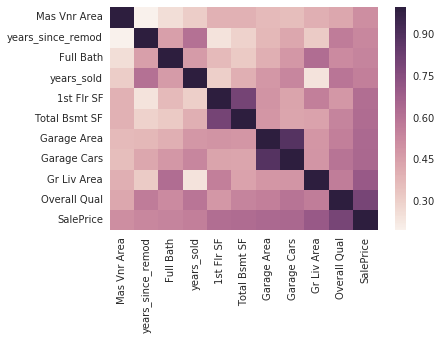

In [43]:
%matplotlib inline
import seaborn as sns
salecorr = salecorr[salecorr>0.5]
housecorr = housenum[salecorr.index].corr()

housecorrsales = housecorr[salecorr.index].abs()
sns.heatmap(housecorrsales)

In [44]:
for col in salecorr.index:
    print(col+":", len(housenum[col].unique()))


Mas Vnr Area: 446
years_since_remod: 63
Full Bath: 5
years_sold: 128
1st Flr SF: 1083
Total Bsmt SF: 1059
Garage Area: 604
Garage Cars: 7
Gr Liv Area: 1292
Overall Qual: 10
SalePrice: 1032


In [45]:
housenum2 = housenum[salecorr.index]
housenum2.head()

,Mas Vnr Area,years_since_remod,Full Bath,years_sold,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
0,112.0,50,1,50,1656,1080.0,528.0,2.0,1656,6,215000
1,0.0,49,1,49,896,882.0,730.0,1.0,896,5,105000
2,108.0,52,1,52,1329,1329.0,312.0,1.0,1329,6,172000
3,0.0,42,2,42,2110,2110.0,522.0,2.0,2110,7,244000
4,0.0,12,2,13,928,928.0,482.0,2.0,1629,5,189900


In [46]:

for col in salecorr.index:
    if len(housenum[col].unique()) < 10:          
        housenum2 = pd.concat([housenum2, pd.get_dummies(housenum2[col])], axis=1)
        housenum2 = housenum2.drop(columns = [col])
housenum2.head()

,Mas Vnr Area,years_since_remod,years_sold,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual,SalePrice,0,1,2,3,4,0.0,1.0,2.0,3.0,4.0,5.0
0,112.0,50,50,1656,1080.0,528.0,1656,6,215000,0,1,0,0,0,0,0,1,0,0,0
1,0.0,49,49,896,882.0,730.0,896,5,105000,0,1,0,0,0,0,1,0,0,0,0
2,108.0,52,52,1329,1329.0,312.0,1329,6,172000,0,1,0,0,0,0,1,0,0,0,0
3,0.0,42,42,2110,2110.0,522.0,2110,7,244000,0,0,1,0,0,0,0,1,0,0,0
4,0.0,12,13,928,928.0,482.0,1629,5,189900,0,0,1,0,0,0,0,1,0,0,0


In [47]:
housecorrsales

,Mas Vnr Area,years_since_remod,Full Bath,years_sold,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
Mas Vnr Area,1.000000,0.198079,0.260153,0.313603,0.395736,0.397040,0.373458,0.360159,0.403611,0.429418,0.508285
years_since_remod,0.198079,1.000000,0.457598,0.613364,0.242987,0.298160,0.377289,0.426856,0.318549,0.570956,0.534940
Full Bath,0.260153,0.457598,1.000000,0.468900,0.371584,0.324973,0.407464,0.478182,0.630321,0.522263,0.545604
years_sold,0.313603,0.613364,0.468900,1.000000,0.310585,0.407360,0.479961,0.537597,0.242510,0.597021,0.558907
1st Flr SF,0.395736,0.242987,0.371584,0.310585,1.000000,0.800720,0.491223,0.439458,0.562166,0.477837,0.621676
Total Bsmt SF,0.397040,0.298160,0.324973,0.407360,0.800720,1.000000,0.485504,0.437608,0.444675,0.547294,0.632280
Garage Area,0.373458,0.377289,0.407464,0.479961,0.491223,0.485504,1.000000,0.889676,0.484892,0.563503,0.640401
Garage Cars,0.360159,0.426856,0.478182,0.537597,0.439458,0.437608,0.889676,1.000000,0.488829,0.599545,0.647877
Gr Liv Area,0.403611,0.318549,0.630321,0.242510,0.562166,0.444675,0.484892,0.488829,1.000000,0.570556,0.706780
Overall Qual,0.429418,0.570956,0.522263,0.597021,0.477837,0.547294,0.563503,0.599545,0.570556,1.000000,0.799262


In [48]:
def select_features(house2):
    housenum = house2.select_dtypes(include=['int', 'float64'])
    salecorr = housenum.corr()['SalePrice'].abs().sort_values()
    salecorr = salecorr[salecorr>0.5]
    housecorr = housenum[salecorr.index].corr()
    housecorrsales = housecorr[salecorr.index].abs()
    housenum2 = housenum[salecorr.index]
    for col in salecorr.index:
    if len(housenum[col].unique()) < 10:          
        housenum2 = pd.concat([housenum2, pd.get_dummies(housenum2[col])], axis=1)
        housenum2 = housenum2.drop(columns = [col])
    return housenum2

In [76]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def train_and_test(data, target, k):
    columns = data.drop(columns = [target]).columns
    data = data.sample(frac=1)
    if(len(data))%2 !=0:
        data = data.drop([0])
    half = int(len(data)/2)
    if k == 0:
        train = data.iloc[:half]
        test = data.iloc[half:]
        lr1 = LinearRegression()        
        lr1.fit(train[columns], train[target])
        trainpred = lr1.predict(test[columns])
        train_rmse = mean_squared_error(test[target], trainpred)**(1/2)
        return train_rmse
    
    elif k == 1:      
        
        train = data.iloc[:half]
        test = data.iloc[half:]
        lr1 = LinearRegression()        
        lr1.fit(train[columns], train[target])
        trainpred = lr1.predict(test[columns])
        train_rmse = mean_squared_error(test[target], trainpred)**(1/2)
        lr2 = LinearRegression()        
        lr2.fit(test[columns], test[target])
        testpred = lr2.predict(train[columns])
        test_rmse = mean_squared_error(train[target], testpred)**(1/2)
        return (train_rmse + test_rmse)/2
    
    elif k == 2:
        kf = KFold(5, shuffle=True, random_state=1)
        lr1 = LinearRegression()
        mses = cross_val_score(lr1, data[columns], data[target], scoring='neg_mean_squared_error', cv=kf)
        avg_rmse = np.mean(((abs(mses)))**(1/2))
        return avg_rmse

In [69]:
housenum2 = housenum2.dropna()
len(housenum2)

2905

In [77]:
print(train_and_test(housenum2, 'SalePrice', 0))
print(train_and_test(housenum2, 'SalePrice', 1))
print(train_and_test(housenum2, 'SalePrice', 2))

35562.03311343522
34324.05160447536
34102.37424853128
